In [ ]:
pip install tensorflow

In [ ]:
pip install opencv-python

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import matplotlib.pyplot as plt

In [2]:
ok_images_dir = "E:\\intern\\CAPP_Version3\\Ok"
not_ok_images_dir = "E:\\intern\\CAPP_Version3\\NotOk"

In [3]:
len (os.listdir(ok_images_dir))

769

In [4]:
len(os.listdir(not_ok_images_dir))

1932

In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image

In [6]:
# Function to load and display an image
def show_image(image_path):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [7]:
ok_image_files = os.listdir(ok_images_dir)

In [8]:
not_ok_image_files = os.listdir(not_ok_images_dir)

In [9]:
# Set the input image dimensions
img_height, img_width = 224, 224
input_shape = (img_height, img_width, 3)  # 3 channels for RGB images


# Create a list to store image paths and corresponding labels
image_paths = []
labels = []

In [10]:
# Load "OK" images and assign label 0
for filename in os.listdir(ok_images_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_paths.append(os.path.join(ok_images_dir, filename))
        labels.append(0)

In [11]:
# Load "NOT OK" images and assign label 1
for filename in os.listdir(not_ok_images_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_paths.append(os.path.join(not_ok_images_dir, filename))
        labels.append(1)

In [12]:
len(image_paths)

2697

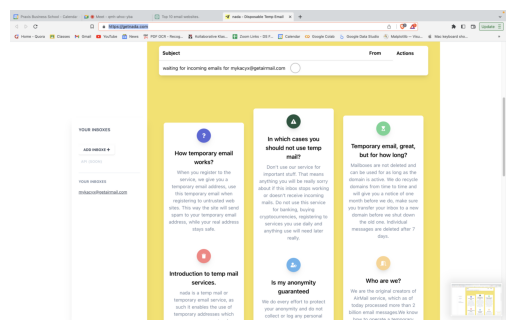

In [13]:
show_image(image_paths[1100])

In [14]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [15]:
# Convert labels to numpy array
labels = np.array(labels)

In [16]:
np.count_nonzero(labels == 0)

769

In [17]:
np.count_nonzero(labels == 1)

1928

In [18]:

# Shuffle the image paths and labels in unison
indices = np.arange(len(image_paths))
np.random.shuffle(indices)
image_paths = np.array(image_paths)[indices]
labels = labels[indices]

In [19]:
# # Split the data into training and validation sets
# split = int(0.8 * len(image_paths))  # 80% for training, 20% for validation
# train_paths, val_paths = image_paths[:split], image_paths[split:]
# train_labels, val_labels = labels[:split], labels[split:]

In [20]:
# Split the data into training, validation, and test sets
split1 = int(0.8 * len(image_paths))  # 80% for training and validation
split2 = int(0.9 * len(image_paths))  # 10% for validation and test

train_paths, val_paths, test_paths = image_paths[:split1], image_paths[split1:split2], image_paths[split2:]
train_labels, val_labels, test_labels = labels[:split1], labels[split1:split2], labels[split2:]

In [21]:
len(train_paths)

2157

In [22]:
len(val_paths)

270

In [23]:
len(train_labels)

2157

In [24]:
np.count_nonzero(train_labels == 1)

1526

In [25]:
np.count_nonzero(train_labels == 0)

631

In [26]:
len(val_labels)

270

In [27]:
len(test_paths)

270

In [28]:
len(test_labels)

270

In [29]:
np.count_nonzero(test_labels == 1)

203

In [30]:
np.count_nonzero(test_labels == 0)

67

In [31]:
def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values
    return image

In [32]:
train_ds = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
train_ds = train_ds.map(lambda x, y: (preprocess_image(x), y))
train_ds = train_ds.batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [33]:
val_ds = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
val_ds = val_ds.map(lambda x, y: (preprocess_image(x), y))
val_ds = val_ds.batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [34]:
test_ds = tf.data.Dataset.from_tensor_slices((test_paths, test_labels))
test_ds = test_ds.map(lambda x, y: (preprocess_image(x), y))
test_ds = test_ds.batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [35]:
# # Configure the dataset for performance
# AUTOTUNE = tf.data.experimental.AUTOTUNE
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [36]:
for image, label in train_ds:
    print(image, label)

tf.Tensor(
[[[[0.27450982 0.16470589 0.40784314]
   [0.27450982 0.16470589 0.40784314]
   [0.27450982 0.16470589 0.40784314]
   ...
   [0.27450982 0.16470589 0.40784314]
   [0.27450982 0.16470589 0.40784314]
   [0.27450982 0.16470589 0.40784314]]

  [[0.27450982 0.16470589 0.40784314]
   [0.27450982 0.16470589 0.40784314]
   [0.27450982 0.16470589 0.40784314]
   ...
   [0.27450982 0.16470589 0.40784314]
   [0.27450982 0.16470589 0.40784314]
   [0.27450982 0.16470589 0.40784314]]

  [[0.27450982 0.16470589 0.40784314]
   [0.27450982 0.16470589 0.40784314]
   [0.46048397 0.15083034 0.2991598 ]
   ...
   [0.4346743  0.3498404  0.53875583]
   [0.27450982 0.16470589 0.40784314]
   [0.27450982 0.16470589 0.40784314]]

  ...

  [[0.0627451  0.0627451  0.0627451 ]
   [0.0627451  0.0627451  0.0627451 ]
   [0.0627451  0.0627451  0.0627451 ]
   ...
   [0.15294118 0.15294118 0.15294118]
   [0.0627451  0.0627451  0.0627451 ]
   [0.35856313 0.35856313 0.35856313]]

  [[0.0627451  0.0627451  0.062745

In [37]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense

In [38]:
# # Create the model
# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=input_shape))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# model.add(Dense(1))
# model.add(Activation('sigmoid'))

In [39]:
from tensorflow.keras.layers import Activation, BatchNormalization

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('gelu'))  # Use Gelu activation function
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform'))
model.add(BatchNormalization())  # Apply batch normalization
model.add(Activation('gelu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('gelu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('gelu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [40]:
model.compile(loss='binary_crossentropy',
              optimizer= 'rmsprop',            
              metrics=['accuracy'])

print(model.summary())  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization (Batch  (None, 109, 109, 64)      256       
 Normalization)                                                  
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0

In [41]:
# # Resizing images
# train_ds = tf.image.resize(train_paths , (224, 224))
# val_ds = tf.image.resize(val_paths , (224, 224))

In [42]:
# Train the model
r = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
68/68 [==============================] - 191s 3s/step - loss: 1.9021 - accuracy: 0.8243 - val_loss: 0.6398 - val_accuracy: 0.7519
Epoch 2/10
68/68 [==============================] - 183s 3s/step - loss: 0.3921 - accuracy: 0.8822 - val_loss: 0.4543 - val_accuracy: 0.8000
Epoch 3/10
68/68 [==============================] - 187s 3s/step - loss: 0.3885 - accuracy: 0.9128 - val_loss: 0.3530 - val_accuracy: 0.8370
Epoch 4/10
68/68 [==============================] - 184s 3s/step - loss: 0.1725 - accuracy: 0.9495 - val_loss: 0.3018 - val_accuracy: 0.8296
Epoch 5/10
68/68 [==============================] - 193s 3s/step - loss: 0.1268 - accuracy: 0.9592 - val_loss: 0.1952 - val_accuracy: 0.9370
Epoch 6/10
68/68 [==============================] - 191s 3s/step - loss: 0.6792 - accuracy: 0.9555 - val_loss: 0.1093 - val_accuracy: 0.9704
Epoch 7/10
68/68 [==============================] - 190s 3s/step - loss: 0.0803 - accuracy: 0.9759 - val_loss: 0.3163 - val_accuracy: 0.9296
Epoch 8/10
68

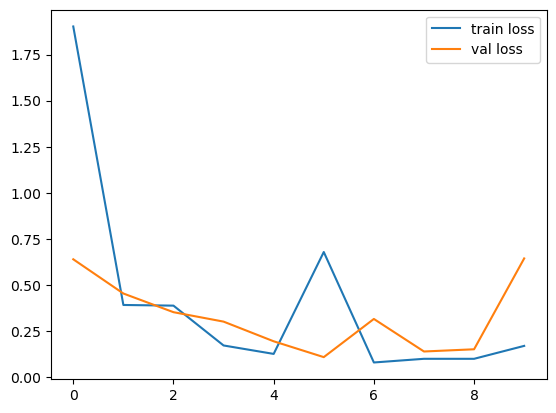

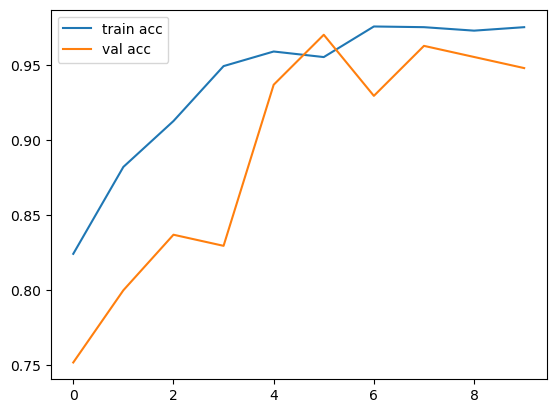

In [43]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [44]:
loss, accuracy = model.evaluate(test_ds)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

9/9 [==============================] - 6s 674ms/step - loss: 1.0882 - accuracy: 0.9481
Test Loss: 1.0881742238998413
Test Accuracy: 0.9481481313705444


In [45]:
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

# Preprocess the test data
test_images = []
for image_path in test_paths:
    image = preprocess_image(image_path)
    test_images.append(image)
test_images = np.array(test_images)

# Make predictions on the test data
predictions = model.predict(test_images)

# Convert predictions to binary labels (0 or 1)
binary_predictions = np.round(predictions).flatten()

# Generate the confusion matrix
cm = confusion_matrix(test_labels, binary_predictions)

# Define the class labels
class_labels = ['OK', 'Not OK']

# Print the confusion matrix in a table
print("Confusion Matrix:")
table = tabulate(cm, headers=class_labels, showindex=class_labels, tablefmt='grid')
print(table)

9/9 [==============================] - 5s 565ms/step
Confusion Matrix:
+--------+------+----------+
|        |   OK |   Not OK |
+========+======+==========+
| OK     |   55 |       12 |
+--------+------+----------+
| Not OK |    2 |      201 |
+--------+------+----------+


In [46]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(test_labels, binary_predictions, target_names=class_labels)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

          OK       0.96      0.82      0.89        67
      Not OK       0.94      0.99      0.97       203

    accuracy                           0.95       270
   macro avg       0.95      0.91      0.93       270
weighted avg       0.95      0.95      0.95       270



In [47]:
from sklearn.metrics import classification_report

# Assuming you have the true labels (test_labels) and binary predictions (binary_predictions) from your model

# Generate the classification report
report = classification_report(test_labels, binary_predictions, target_names=class_labels, output_dict=True)

# Convert the report dictionary to a table format
table = []
for class_label in class_labels:
    precision = report[class_label]['precision']
    recall = report[class_label]['recall']
    f1_score = report[class_label]['f1-score']
    support = report[class_label]['support']
    table.append([class_label, precision, recall, f1_score, support])

# Print the classification report in a table format
print("Classification Report:")
print(tabulate(table, headers=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'], tablefmt='grid'))

Classification Report:
+---------+-------------+----------+------------+-----------+
| Class   |   Precision |   Recall |   F1-Score |   Support |
+=========+=============+==========+============+===========+
| OK      |    0.964912 | 0.820896 |   0.887097 |        67 |
+---------+-------------+----------+------------+-----------+
| Not OK  |    0.943662 | 0.990148 |   0.966346 |       203 |
+---------+-------------+----------+------------+-----------+


In [48]:
model.save("E:\\saved_model\intership_240723_A.h5")

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
